# CDS6214-DATA SCIENCE FUNDAMENTALS Project TT10L Group I

# Transportation Project <br>
Title : Used Car Price Prediction

# **Sections**
1. Data Pre-processing / Cleaning
2. Data Analysis/Statistical Study with 4 Question  
3. Modelling (2 models: RandomForest, XGBoost)  
4. Knowledge Evaluation

# 1. Data Preprocessing & Cleaning

Imports & Load Data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, linregress, chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, ConfusionMatrixDisplay
)
# Load the dataset
df = pd.read_csv('used_car_price_dataset_extended.csv')
display(df)

,RowNumber,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
0,1,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,NaN,0,No
1,2,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,NaN,0,Yes
2,3,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,Full,1,Yes
3,4,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,Full,0,Yes
4,5,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,Full,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1996,15.25,1500,Petrol,2,5498.71,Hyundai,Manual,Silver,NaN,0,Yes
9996,9997,1997,14.45,5000,Diesel,1,9588.31,Honda,Manual,Gray,Full,0,Yes
9997,9998,2002,19.41,1000,Diesel,4,4557.10,Kia,Manual,Black,Full,0,Yes
9998,9999,2005,12.95,4000,Petrol,5,7413.59,BMW,Automatic,Blue,Full,0,Yes


Inspect & Clean

In [3]:
# Missing values
print("Missing values per column:\n", df.isnull().sum())

# Drop exact duplicates
df.drop_duplicates(inplace=True)
print(f"Rows after deduplication: {len(df)}")

Missing values per column:
 RowNumber                0
make_year                0
mileage_kmpl             0
engine_cc                0
fuel_type                0
owner_count              0
price_usd                0
brand                    0
transmission             0
color                    0
service_history       2038
accidents_reported       0
insurance_valid          0
dtype: int64
Rows after deduplication: 10000


# Exploratory Questions
Here are the four exploratory questions questions that we address in our project Exploratory Data Analysis:
1. **Q1:** Does cars with a higher prices  tends to have higher service history?
2. **Q2:** How has engine capacity changed over time? Are newer cars generally more efficient (lower cc) or more powerful?
3. **Q3:** Are certain car colors more frequently associated with accident reports?  
4. **Q4:** Do older economy cars tend to have more owners than higher-end cars?

# 🔧 Data Pre-processing / Cleaning

Data Pre-processing / Cleaning for all question

In [ ]:
# Question 1: Does cars with a higher prices  tends to have higher service history?
df_q1 = df[['price_usd', 'service_history']].dropna()
df_q1['service_history'] = df_q1['service_history'].str.strip().str.title()

# Question 2: How has engine capacity changed over time? Are newer cars generally more efficient (lower cc) or more powerful?
df_q2 = df[['make_year','engine_cc']].dropna()
df_q2['make_year'] = df_q2['make_year'].astype(int)

# Question 3: Are certain car colors more frequently associated with accident reports?
df_q3 = df[['color','accidents_reported','brand','make_year','transmission']].dropna()
df_q3['color']      = df_q3['color'].str.strip().str.title()
df_q3['has_accident']= (df_q3['accidents_reported'] > 0).astype(int)

# Question 4: Do older economy cars tend to have more owners than higher-end cars?
economy = ['Toyota','Honda','Hyundai','Nissan','Kia']
luxury  = ['Bmw','Mercedes-Benz','Audi','Lexus','Porsche']
df_q4 = df[['make_year','owner_count','brand']].dropna()
df_q4['brand'] = df_q4['brand'].str.strip().str.title()
df_q4['category'] = df_q4['brand'].apply(
    lambda b: 'Economy' if b in economy else ('High-End' if b in luxury else 'Other')
)
df_q4 = df_q4[df_q4['category'].isin(['Economy','High-End'])]

In [18]:
display(df.head().transpose())

num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

summary_stats = df.describe().transpose()
display(summary_stats)

,0,1,2,3,4
RowNumber,1,2,3,4,5
make_year,2001,2014,2023,2009,2005
mileage_kmpl,8.17,17.59,18.09,11.28,12.23
engine_cc,4000,1500,2500,800,1000
fuel_type,Petrol,Petrol,Diesel,Petrol,Petrol
owner_count,4,4,5,1,2
price_usd,8587.64,5943.5,9273.58,6836.24,4625.79
brand,Chevrolet,Honda,Bmw,Hyundai,Nissan
transmission,Manual,Manual,Automatic,Manual,Automatic
color,White,Black,Black,Blue,Red


Number of rows: 10000
Number of columns: 13


,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5000.500000,2886.895680,1.0,2500.7500,5000.50,7500.2500,10000.00
make_year,10000.0,2009.206900,8.373858,1995.0,2002.0000,2009.00,2016.0000,2023.00
mileage_kmpl,10000.0,17.960753,5.025486,5.0,14.5400,17.97,21.3525,35.00
engine_cc,10000.0,2287.130000,1291.276927,800.0,1200.0000,1800.00,3000.0000,5000.00
owner_count,10000.0,3.003500,1.418904,1.0,2.0000,3.00,4.0000,5.00
price_usd,10000.0,7179.754532,2795.270940,1000.0,5176.5475,6961.26,8993.7325,17647.63
accidents_reported,10000.0,0.492200,0.694109,0.0,0.0000,0.00,1.0000,5.00


# 📊 Data Analysis / Statistical Study

Exploratory Data Analysis

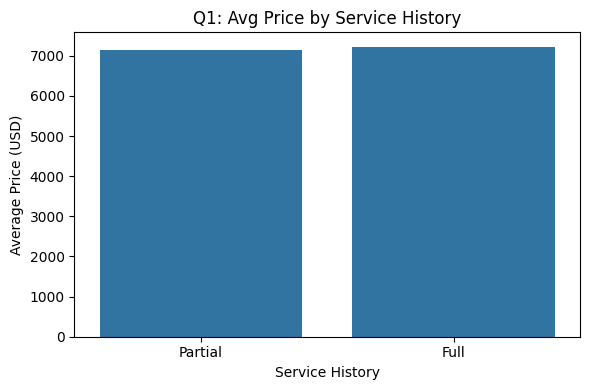

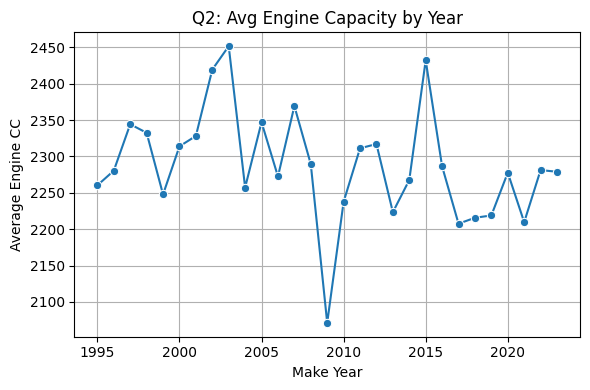

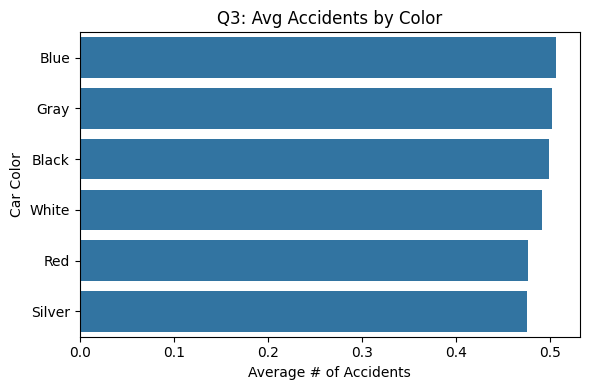

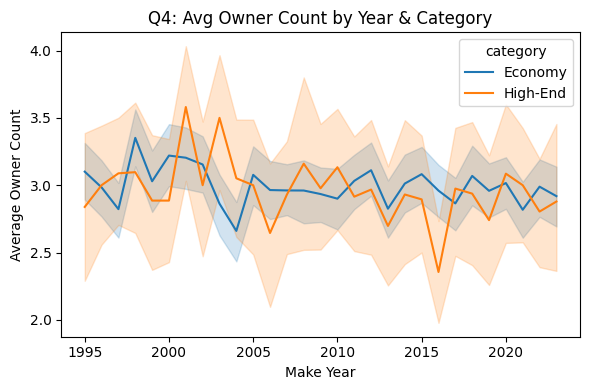

In [16]:
# Question 1: Does cars with a higher prices  tends to have higher service history?
avg_price = df_q1.groupby('service_history')['price_usd'].mean().sort_values()
plt.figure(figsize=(6,4))
sns.barplot(x=avg_price.index, y=avg_price.values)
plt.title("Q1: Avg Price by Service History")
plt.xlabel("Service History")
plt.ylabel("Average Price (USD)")
plt.tight_layout()
plt.show()

# Question 2: How has engine capacity changed over time? Are newer cars generally more efficient (lower cc) or more powerful?
trend = df_q2.groupby('make_year')['engine_cc'].mean()
plt.figure(figsize=(6,4))
sns.lineplot(x=trend.index, y=trend.values, marker='o')
plt.title("Q2: Avg Engine Capacity by Year")
plt.xlabel("Make Year")
plt.ylabel("Average Engine CC")
plt.grid(True)
plt.tight_layout()
plt.show()

# Question 3: Are certain car colors more frequently associated with accident reports?
avg_acc_by_color = df_q3.groupby('color')['accidents_reported'].mean().sort_values(ascending=False)
plt.figure(figsize=(6,4))
sns.barplot(x=avg_acc_by_color.values, y=avg_acc_by_color.index)
plt.title("Q3: Avg Accidents by Color")
plt.xlabel("Average # of Accidents")
plt.ylabel("Car Color")
plt.tight_layout()
plt.show()

# Question 4: Do older economy cars tend to have more owners than higher-end cars?
plt.figure(figsize=(6,4))
sns.lineplot(data=df_q4, x='make_year', y='owner_count', hue='category', estimator='mean')
plt.title("Q4: Avg Owner Count by Year & Category")
plt.xlabel("Make Year")
plt.ylabel("Average Owner Count")
plt.tight_layout()
plt.show()